In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../working_data/Data1.csv',index_col=0)
df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


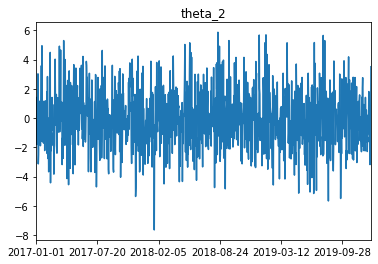

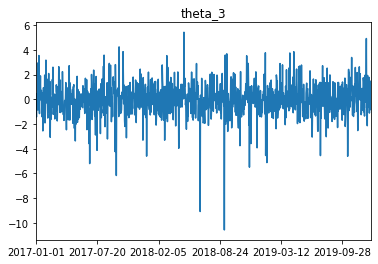

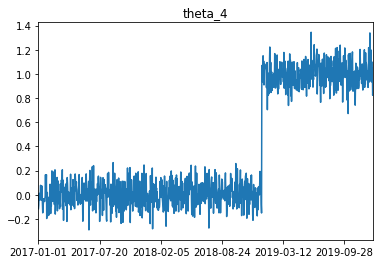

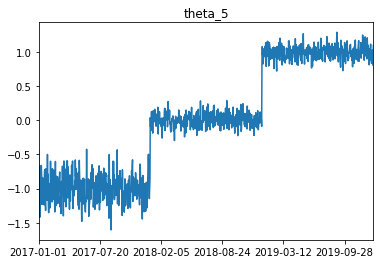

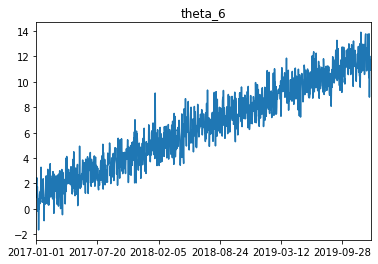

In [3]:
for c in df.columns[1:]:
    df[c].plot()
    plt.title(c)
    plt.show()

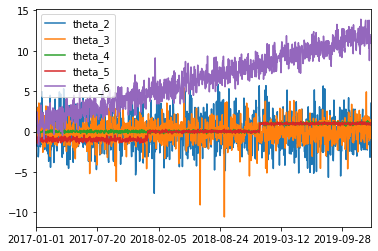

In [4]:
for c in df.columns[1:]:
    df[c].plot()
plt.legend(df.columns[1:])
plt.show()

In [5]:
bw = []
for c in df.columns[1:]:
    bw.append(2*(df[c].quantile(0.25) - df[c].quantile(0.75))/len(df[c]))

In [6]:
dfm = df.melt()

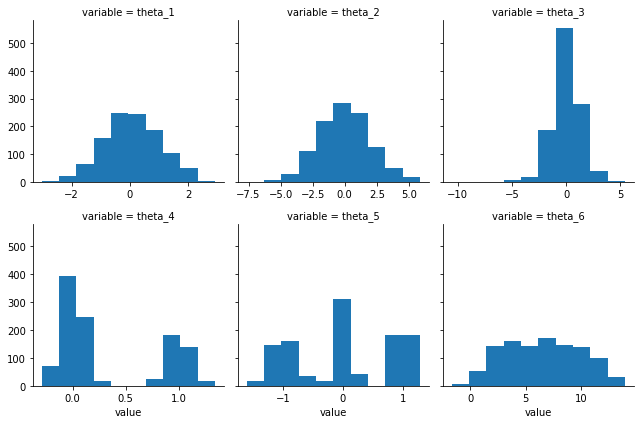

In [7]:
g = sns.FacetGrid(dfm, col='variable', col_wrap=3, sharex = False)
g = g.map(plt.hist, 'value')

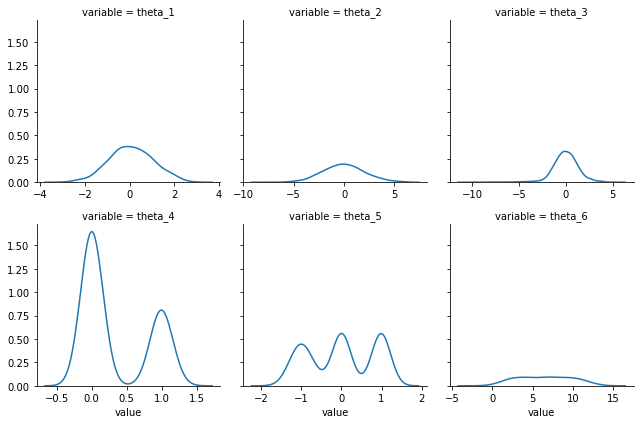

In [8]:
f = sns.FacetGrid(dfm, col='variable', col_wrap=3, sharex = False)
f = f.map(sns.kdeplot, 'value')

In [9]:
df2 = df.loc['2018-01-01':'2018-12-31','theta_1':'theta_4']
df2

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025
...,...,...,...,...
2018-12-27,0.473556,-0.651265,-0.523058,0.076798
2018-12-28,1.433117,0.325632,0.905920,0.028891
2018-12-29,0.285428,-0.476290,1.082404,0.111482
2018-12-30,2.249273,-1.233575,-0.666277,-0.080878


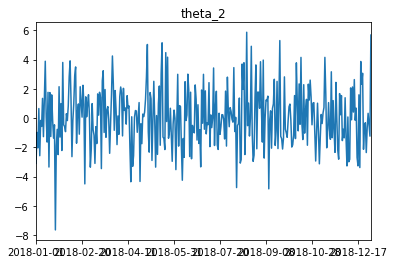

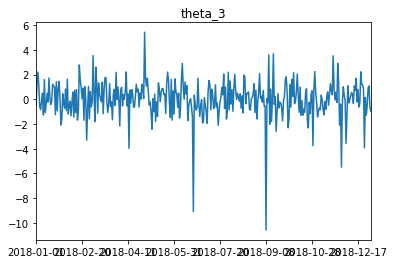

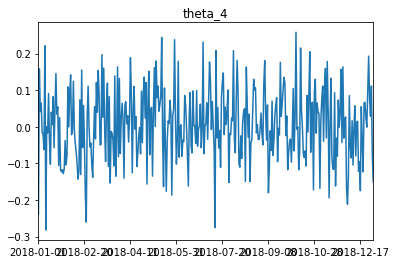

In [10]:
for c in df2.columns[1:]:
    df2[c].plot()
    plt.title(c)
    plt.show()

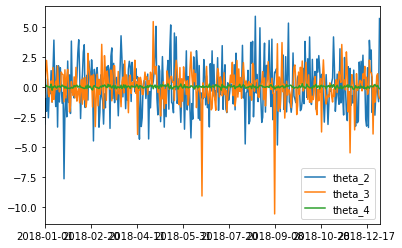

In [11]:
for c in df2.columns[1:]:
    df2[c].plot()
plt.legend(df.columns[1:])
plt.show()

In [12]:
df2m = df2.melt()
df2

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025
...,...,...,...,...
2018-12-27,0.473556,-0.651265,-0.523058,0.076798
2018-12-28,1.433117,0.325632,0.905920,0.028891
2018-12-29,0.285428,-0.476290,1.082404,0.111482
2018-12-30,2.249273,-1.233575,-0.666277,-0.080878


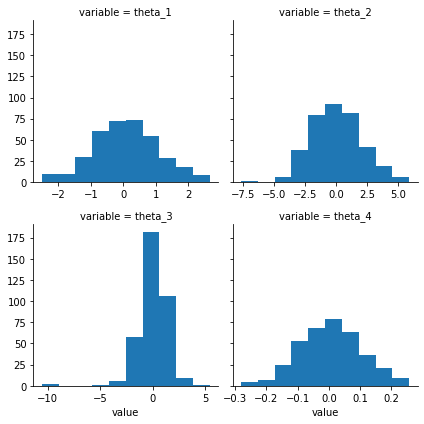

In [13]:
g = sns.FacetGrid(df2m, col='variable', col_wrap=2, sharex = False)
g = g.map(plt.hist, 'value')

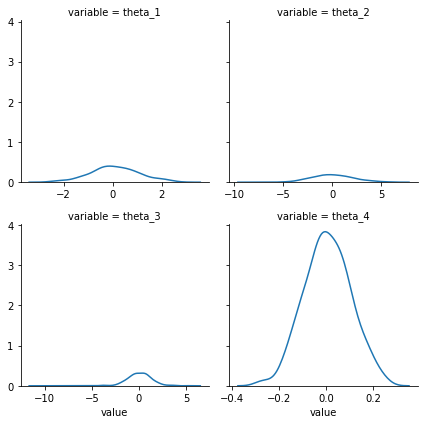

In [14]:
f = sns.FacetGrid(df2m, col='variable', col_wrap=2, sharex = False)
f = f.map(sns.kdeplot, 'value')